#Supply Chain Management

###Introduction

This project responds to the operational challenges faced by a Fast Moving Consumer Goods (FMCG) company in managing their instant noodles business. The company's higher management has observed a significant disparity between demand and supply over the past two years, resulting in increased inventory costs and overall financial losses. To address this issue, the project aims to develop a model using historical data to determine the optimal weight of the product for shipment from each warehouse. The comprehensive data science approach involves Exploratory Data Analysis (EDA), data processing, model building, evaluation, and visualization. The dataset encompasses crucial attributes, including warehouse details, geographical factors, and historical performance metrics. Employing supervised regression algorithms such as linear regression, decision tree, random forest, AdaBoost, Gradient Boosting, and Support Vector Machine, the project seeks to uncover hidden patterns and insights within the data. Ultimately, the goal is to enable the company's higher management to make informed decisions regarding inventory management and optimize the supply chain across all warehouses in the country.

###Import required libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

###Load Dataset

In [63]:
# Training Dataset
df_train=pd.read_csv('supply_train.csv')
df_train

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [64]:
# Testing Dataset
df_test=pd.read_csv('supply_test.csv')
df_test

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


###Data Exploration

Training Data

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [66]:
df_train.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [67]:
df_train.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [68]:
for i in df_train.columns:
    print(f'Column {i} : {df_train[i].nunique()}')

Column Unnamed: 0 : 16620
Column Ware_house_ID : 16620
Column WH_Manager_ID : 16620
Column Location_type : 2
Column WH_capacity_size : 3
Column zone : 4
Column WH_regional_zone : 6
Column num_refill_req_l3m : 9
Column transport_issue_l1y : 6
Column Competitor_in_mkt : 12
Column retail_shop_num : 4356
Column wh_owner_type : 2
Column distributor_num : 56
Column flood_impacted : 2
Column flood_proof : 2
Column electric_supply : 2
Column dist_from_hub : 217
Column workers_num : 60
Column wh_est_year : 28
Column storage_issue_reported_l3m : 37
Column temp_reg_mach : 2
Column approved_wh_govt_certificate : 5
Column wh_breakdown_l3m : 7
Column govt_check_l3m : 32
Column product_wg_ton : 4248


In [69]:
for i in df_train.columns:
    print(f'{i} : {df_train[i].unique()}')

Unnamed: 0 : [    0     1     2 ... 16617 16618 16619]
Ware_house_ID : ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
WH_Manager_ID : ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
Location_type : ['Urban' 'Rural']
WH_capacity_size : ['Small' 'Large' 'Mid']
zone : ['West' 'North' 'South' 'East']
WH_regional_zone : ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
num_refill_req_l3m : [3 0 1 7 8 4 6 5 2]
transport_issue_l1y : [1 0 4 3 2 5]
Competitor_in_mkt : [ 2  4  3  5  1  8  7  6 10  9 12  0]
retail_shop_num : [4651 6217 4306 ... 2716 8344 7347]
wh_owner_type : ['Rented' 'Company Owned']
distributor_num : [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
flood_impacted : [0 1]
flood_proof : [1 0]
electric_supply : [1 0]
dist_from_hub : [ 91 210 161 103 112 152  77 241 124  78 150 225  95 242 12

Testing Data

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [71]:
df_test.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [72]:
df_test.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [73]:
for i in df_test.columns:
    print(f'{i} : {df_test[i].nunique()}')

Unnamed: 0 : 5529
Ware_house_ID : 5529
WH_Manager_ID : 5529
Location_type : 2
WH_capacity_size : 3
zone : 4
WH_regional_zone : 6
num_refill_req_l3m : 9
transport_issue_l1y : 6
Competitor_in_mkt : 9
retail_shop_num : 2891
wh_owner_type : 2
distributor_num : 56
flood_impacted : 2
flood_proof : 2
electric_supply : 2
dist_from_hub : 217
workers_num : 55
wh_est_year : 28
storage_issue_reported_l3m : 37
temp_reg_mach : 2
approved_wh_govt_certificate : 5
wh_breakdown_l3m : 7
govt_check_l3m : 32
product_wg_ton : 2946


In [74]:
for i in df_test.columns:
    print(f'{i} : {df_test[i].unique()}')

Unnamed: 0 : [16621 16622 16623 ... 22147 22148 22149]
Ware_house_ID : ['WH_116621' 'WH_116622' 'WH_116623' ... 'WH_122147' 'WH_122148'
 'WH_122149']
WH_Manager_ID : ['EID_66621' 'EID_66622' 'EID_66623' ... 'EID_72147' 'EID_72148'
 'EID_72149']
Location_type : ['Rural' 'Urban']
WH_capacity_size : ['Large' 'Small' 'Mid']
zone : ['North' 'West' 'South' 'East']
WH_regional_zone : ['Zone 5' 'Zone 6' 'Zone 4' 'Zone 1' 'Zone 2' 'Zone 3']
num_refill_req_l3m : [5 3 6 1 2 4 7 8 0]
transport_issue_l1y : [0 2 3 1 4 5]
Competitor_in_mkt : [3 2 4 5 1 6 8 7 9]
retail_shop_num : [5590 5856 4803 ... 4542 6080 5268]
wh_owner_type : ['Company Owned' 'Rented']
distributor_num : [15 40 24 47 60 18 39 22 59 56 38 16 29 20 44 49 37 36 61 32 46 35 51 69
 68 17 28 33 45 53 48 43 64 66 55 25 65 34 63 30 26 50 70 62 27 58 52 41
 54 31 21 42 57 19 67 23]
flood_impacted : [0 1]
flood_proof : [0 1]
electric_supply : [0 1]
dist_from_hub : [156  79  70 255 205 240  83 176 260 186 184 128 104 143 172 204 215 125
 119

###Data Preprocessing

In [75]:
# Drop Column unnamed fromm training data
df_train= df_train.drop(columns=['Unnamed: 0'])
df_train.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [76]:
# Drop Column unnamed fromm testing data
df_test= df_test.drop(columns=['Unnamed: 0'])
df_test.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,4803,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,4784,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,3699,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [77]:
# Checking null values in training data
df_train.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [78]:
wh_est_year_mean=df_train.wh_est_year.mean()
df_train['wh_est_year'].fillna(wh_est_year_mean, inplace=True)

In [79]:
df_train=df_train.dropna()

In [80]:
df_train.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [81]:
df_train.duplicated().sum()


0

In [82]:
df_train.shape

(15374, 24)

The training data consist of 15374 rows and 24 columns


In [83]:
# Checking null values in testing data
df_test.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [84]:
wh_est_year_mean=df_test.wh_est_year.mean()
df_test['wh_est_year'].fillna(wh_est_year_mean, inplace=True)

In [85]:
df_test=df_test.dropna()

In [86]:
df_test.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [87]:
df_test.duplicated().sum()

0

In [88]:
df_test.shape

(5120, 24)

The test data consist of 5120 rows and 24 columns

###EDA(Exploratory Data Analysis)

Text(0.5, 1.0, 'Number of workers in the warehouse')

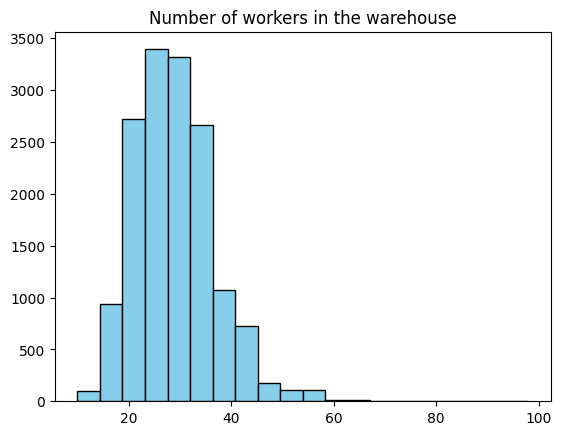

In [89]:
plt.hist(df_train['workers_num'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number of workers in the warehouse')

Text(0.5, 1.0, 'Type of approval')

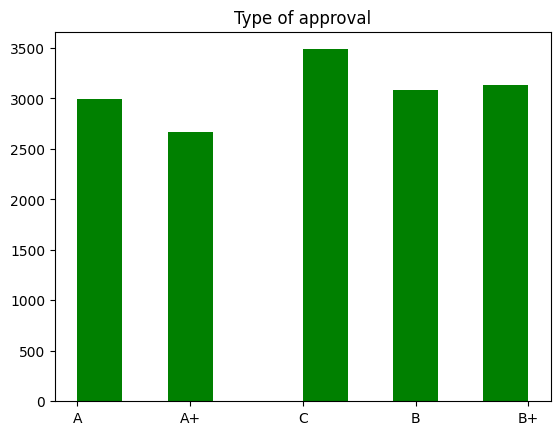

In [90]:
plt.hist(df_train['approved_wh_govt_certificate'], color='green')
plt.title('Type of approval')

[Text(0.5, 1.0, 'Location Type by zone')]

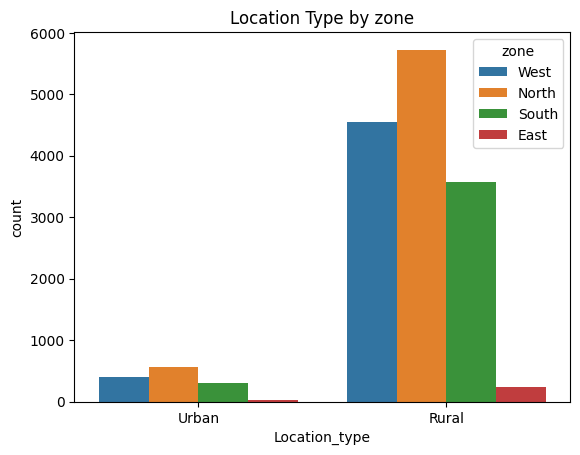

In [91]:
sns.countplot(data=df_train,x='Location_type',hue='zone').set(title='Location Type by zone')

<Axes: xlabel='approved_wh_govt_certificate', ylabel='wh_breakdown_l3m'>

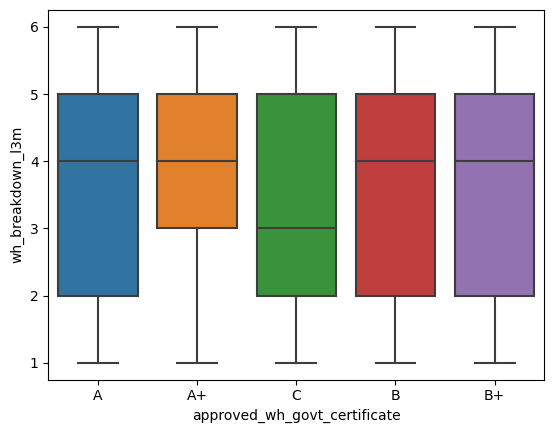

In [92]:
sns.boxplot(data=df_train,x='approved_wh_govt_certificate',y='wh_breakdown_l3m')

Text(0.5, 1.0, 'Warehouse Distribution Based on Capacity size')

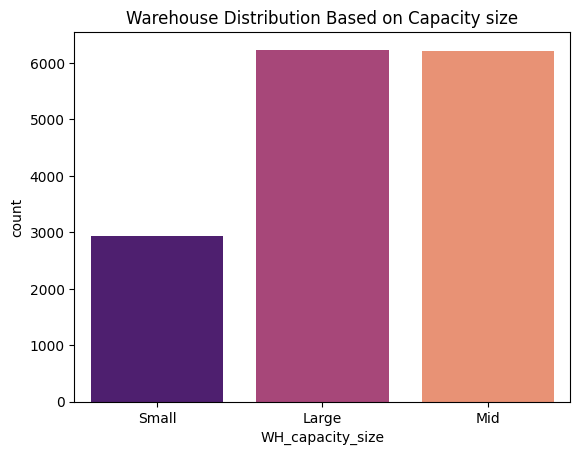

In [93]:
sns.countplot(x='WH_capacity_size', data=df_train, palette='magma')
plt.title('Warehouse Distribution Based on Capacity size')

Text(0.5, 1.0, 'Warehouse Distribution Based on Owner Type')

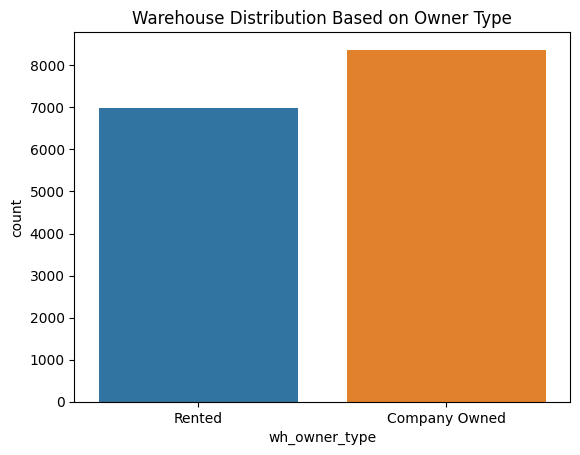

In [94]:
sns.countplot(x='wh_owner_type', data=df_train)
plt.title('Warehouse Distribution Based on Owner Type')

Text(0, 0.5, 'Total Transportation Issues')

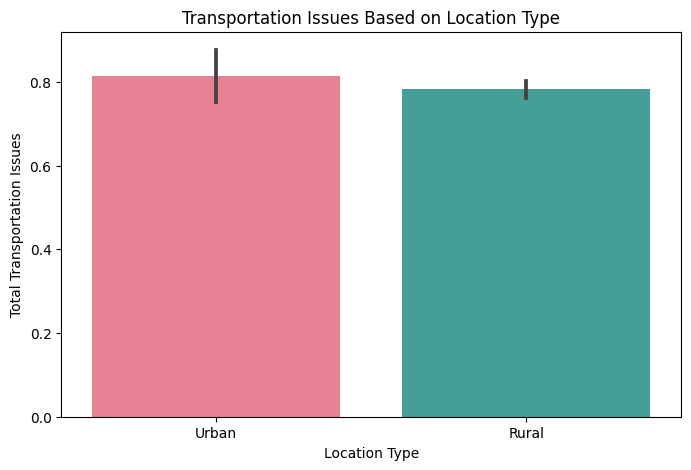

In [95]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Location_type', y='transport_issue_l1y', data=df_train, palette='husl')
plt.title('Transportation Issues Based on Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Transportation Issues')

<ipython-input-102-1e367e0f673f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_train, x='workers_num', y='wh_breakdown_l3m', ci=None)


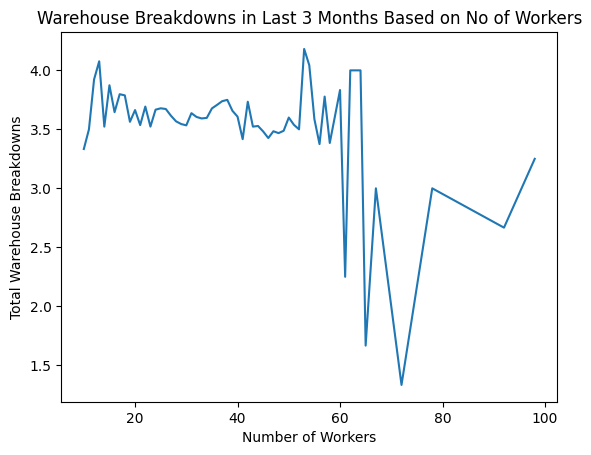

In [102]:
sns.lineplot(data=df_train, x='workers_num', y='wh_breakdown_l3m', ci=None)
plt.title('Warehouse Breakdowns in Last 3 Months Based on No of Workers')
plt.xlabel('Number of Workers')
plt.ylabel('Total Warehouse Breakdowns')
plt.show()

In [98]:
#Convert the 'Ware_house_ID' and 'WH_Manager_ID' columns into numeric form from training data
df_train['Ware_house_ID'] = df_train['Ware_house_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [99]:
df_train.Ware_house_ID.dtype

dtype('int64')

In [100]:
df_train['WH_Manager_ID'] = df_train['WH_Manager_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [101]:
df_train.WH_Manager_ID.dtype

dtype('int64')

In [103]:
#Convert the 'Ware_house_ID' and 'WH_Manager_ID' columns into numeric form from testing data
df_test['Ware_house_ID'] = df_test['Ware_house_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [104]:
df_test.Ware_house_ID.dtype

dtype('int64')

In [105]:
df_test['WH_Manager_ID'] = df_test['WH_Manager_ID'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

In [106]:
df_test.WH_Manager_ID.dtype

dtype('int64')

Label Encoding

In [107]:
# Find Categorical Columns
df_train.select_dtypes(include=['object']).columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')

In [109]:
#Label Encoding in training data
label_encoder=LabelEncoder()
b=['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate']
for i in b:
  df_train[i]=label_encoder.fit_transform(df_train[i])
df_train

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,50000,1,2,3,5,3,1,2,4651,...,1,91,29.0,2009.34532,13,0,0,5,15,17115
1,100001,50001,0,0,1,4,0,0,4,6217,...,1,210,31.0,2009.34532,4,0,0,3,17,5074
2,100002,50002,0,1,2,1,1,0,4,4306,...,0,161,37.0,2009.34532,17,0,0,6,22,23137
3,100003,50003,0,1,1,2,7,4,2,6000,...,0,103,21.0,2009.34532,17,1,1,3,27,22115
4,100004,50004,0,0,1,4,3,1,2,4740,...,1,112,25.0,2009.00000,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,116613,66613,0,0,2,4,0,0,3,5334,...,1,230,29.0,2009.34532,11,0,2,4,25,14089
16615,116615,66615,1,0,3,5,3,1,6,4779,...,0,240,19.0,2009.00000,14,0,3,5,23,16094
16616,116616,66616,1,0,1,4,2,0,2,5718,...,1,164,30.0,2009.34532,17,0,3,6,24,21113
16617,116617,66617,0,0,1,5,5,0,4,4514,...,1,211,24.0,2003.00000,24,1,2,5,29,28117


In [110]:
#Label Encoding in testing data
label_encoder=LabelEncoder()
b=['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate']
for i in b:
  df_test[i]=label_encoder.fit_transform(df_test[i])
df_test

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,0,0,1,4,5,0,3,5590,...,0,156,30.0,2006.000000,24,0,0,2,5,30132
1,116622,66622,0,0,1,4,5,0,2,5856,...,1,79,31.0,2019.000000,5,1,4,2,24,6075
2,116623,66623,0,2,1,5,3,0,3,4803,...,1,70,41.0,2008.000000,19,1,1,5,9,24076
3,116624,66624,0,1,3,3,5,2,2,4784,...,1,255,33.0,2017.000000,9,1,1,3,11,13092
4,116625,66625,1,1,1,3,6,0,4,3699,...,0,205,20.0,1999.000000,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,122144,72144,0,2,2,5,1,2,3,3325,...,1,160,37.0,2009.572785,9,0,2,5,9,10068
5524,122145,72145,0,0,1,5,8,1,3,5030,...,1,203,28.0,2007.000000,22,1,1,2,4,29138
5526,122147,72147,0,0,1,5,7,2,2,5268,...,0,99,22.0,2009.572785,20,0,3,6,4,24072
5527,122148,72148,0,0,1,5,6,2,4,4378,...,0,220,17.0,2009.572785,13,0,2,3,28,15055


Training and Testing Data

In [111]:
# Drop unnecessary features in training data
train_df=df_train.drop(['WH_Manager_ID','WH_regional_zone', 'flood_impacted'], axis = 1)
train_df.head()

,Ware_house_ID,Location_type,WH_capacity_size,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,1,2,3,3,1,2,4651,1,24,...,1,91,29.0,2009.34532,13,0,0,5,15,17115
1,100001,0,0,1,0,0,4,6217,0,47,...,1,210,31.0,2009.34532,4,0,0,3,17,5074
2,100002,0,1,2,1,0,4,4306,0,64,...,0,161,37.0,2009.34532,17,0,0,6,22,23137
3,100003,0,1,1,7,4,2,6000,1,50,...,0,103,21.0,2009.34532,17,1,1,3,27,22115
4,100004,0,0,1,3,1,2,4740,0,42,...,1,112,25.0,2009.00000,18,0,4,6,24,24071


In [112]:
# Drop unnecessary features in testing data
test_df=df_test.drop(['WH_Manager_ID','WH_regional_zone', 'flood_impacted'], axis = 1)
test_df.head()

,Ware_house_ID,Location_type,WH_capacity_size,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,0,0,1,5,0,3,5590,0,15,...,0,156,30.0,2006.0,24,0,0,2,5,30132
1,116622,0,0,1,5,0,2,5856,0,40,...,1,79,31.0,2019.0,5,1,4,2,24,6075
2,116623,0,2,1,3,0,3,4803,1,40,...,1,70,41.0,2008.0,19,1,1,5,9,24076
3,116624,0,1,3,5,2,2,4784,1,15,...,1,255,33.0,2017.0,9,1,1,3,11,13092
4,116625,1,1,1,6,0,4,3699,1,24,...,0,205,20.0,1999.0,25,0,2,4,26,29071


In [114]:
# Splitting training data
X_train=train_df.drop(['product_wg_ton'], axis=1)
X_train.head()

,Ware_house_ID,Location_type,WH_capacity_size,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,100000,1,2,3,3,1,2,4651,1,24,1,1,91,29.0,2009.34532,13,0,0,5,15
1,100001,0,0,1,0,0,4,6217,0,47,0,1,210,31.0,2009.34532,4,0,0,3,17
2,100002,0,1,2,1,0,4,4306,0,64,0,0,161,37.0,2009.34532,17,0,0,6,22
3,100003,0,1,1,7,4,2,6000,1,50,0,0,103,21.0,2009.34532,17,1,1,3,27
4,100004,0,0,1,3,1,2,4740,0,42,0,1,112,25.0,2009.00000,18,0,4,6,24


In [115]:
y_train=train_df['product_wg_ton']
y_train.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

In [117]:
# Splitting testing data
X_test=test_df.drop(['product_wg_ton'], axis=1)
X_test.head()

,Ware_house_ID,Location_type,WH_capacity_size,zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,116621,0,0,1,5,0,3,5590,0,15,0,0,156,30.0,2006.0,24,0,0,2,5
1,116622,0,0,1,5,0,2,5856,0,40,0,1,79,31.0,2019.0,5,1,4,2,24
2,116623,0,2,1,3,0,3,4803,1,40,0,1,70,41.0,2008.0,19,1,1,5,9
3,116624,0,1,3,5,2,2,4784,1,15,0,1,255,33.0,2017.0,9,1,1,3,11
4,116625,1,1,1,6,0,4,3699,1,24,0,0,205,20.0,1999.0,25,0,2,4,26


In [120]:
y_test=test_df['product_wg_ton']
y_test.head()

0    30132
1     6075
2    24076
3    13092
4    29071
Name: product_wg_ton, dtype: int64

ML Model Building

Linear Regression

In [122]:
model1=LinearRegression()
model1.fit(X_train,y_train)
model1_pred=model1.predict(X_test)
model1_pred

array([30975.48547366,  7004.10658401, 25458.39920648, ...,
       24654.28358385, 15910.18478731, 12725.91488717])

Decision Tree

In [123]:
model2=DecisionTreeRegressor()
model2.fit(X_train, y_train)
model2_pred=model2.predict(X_test)
model2_pred

array([33124.,  7117., 27119., ..., 23122., 15103., 14102.])

Random Forest

In [124]:
model3=RandomForestRegressor()
model3.fit(X_train, y_train)
model3_pred=model3.predict(X_test)
model3_pred

array([31522.32,  6715.68, 25877.58, ..., 23800.65, 15392.34, 14082.72])

AdaBoost

In [125]:
model4=AdaBoostRegressor()
model4.fit(X_train, y_train)
model4_pred=model4.predict(X_test)
model4_pred

array([30445.84892867,  7288.27973672, 25114.94500432, ...,
       25780.82937893, 17047.74897541, 14479.43627451])

Gradient Boosting

In [126]:
model5=GradientBoostingRegressor()
model5.fit(X_train, y_train)
model5_pred=model5.predict(X_test)
model5_pred

array([31075.09128238,  6903.69771805, 25527.92609077, ...,
       23276.96297445, 15137.56230533, 13841.28726962])

SVM(Support Vector Machine)

In [127]:
model6=SVR(kernel='linear')
model6.fit(X_train, y_train)
model6_pred = model6.predict(X_test)
model6_pred

array([34441.01301684,  7014.7668468 , 26137.65877642, ...,
       29406.35398783, 18289.70603861, 13922.66258158])

Evaluation

In [128]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Support Vector Machine']
predictions = [model1_pred, model2_pred, model3_pred, model4_pred, model5_pred, model6_pred]

for model_name, pred in zip(models, predictions):
    mse = mean_squared_error(y_test, pred)
    msa=mean_absolute_error(y_test,pred)
    r2 = r2_score(y_test, pred)
    print(f"{model_name} - MSE: {mse}, MSA: {msa}, R2 Score: {r2}")

Linear Regression - MSE: 1932380.8502182432, MSA: 1089.0420693184665, R2 Score: 0.9850863141868745
Decision Tree - MSE: 1429954.975, MSA: 845.147265625, R2 Score: 0.9889639253971818
Random Forest - MSE: 700185.0559393555, MSA: 656.3362402343749, R2 Score: 0.9945961273968608
AdaBoost - MSE: 2345922.4470925923, MSA: 1235.782039368743, R2 Score: 0.9818946920769029
Gradient Boosting - MSE: 633147.7501061646, MSA: 632.7339414655702, R2 Score: 0.9951135064201737
Support Vector Machine - MSE: 7404657.966995847, MSA: 2261.98614462208, R2 Score: 0.9428524959451131


These metrics evaluate the performance of each regression model. Lower values for MSE and MAE indicate better performance, while R2 closer to 1 suggests a better fit of the model to the data.Therefore,Gradient Boosting and Random Forest are the best model for goood prediction.
